# Pruebo los kfold del dataset

Algunos detalles:
* AD1 y AD3 los escuché manualmente y los asigné a los géneros correspondientes
* Tengo muy pocos 0-Hombre-(1.695, 13.94] asi que los junté con 0-Hombre-(0.93, 1.695]

In [1]:
import Datasets
import imp
import pandas as pd
import utils
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
datasetName, dfAudio, dfMetadata = Datasets.getQOMvsSPA( Datasets.DATASET_RAW, split="estratificado" )

## Tengo la misma cantidad de segmentos por corte ?

In [3]:
dfMetadata.groupby("kfold").count()

filenames  speakers  speakers_agg  durations  labels  lang  \
kfold                                                               
0            771       771           771        771     771   771   
1            771       771           771        771     771   771   
2            771       771           771        771     771   771   
3            770       770           770        770     770   770   
4            770       770           770        770     770   770   

       durationsDiscreto  labelsDurationsSpeakerAgg  
kfold                                                
0                    771                        771  
1                    771                        771  
2                    771                        771  
3                    770                        770  
4                    770                        770

### Tengo la misma duración de segmentos por corte ?

In [ ]:
dfMetadata.groupby(["kfold"]).sum()["durations"]

### Tengo la misma variedad de hablantes por corte ?

In [ ]:
dfMetadata.groupby(["kfold","speakers_agg"]).count()

## Segmento folds por hablante

In [4]:
dfMetadata["sujeto"] = dfMetadata.filenames.str.split("/", expand=True)[5]

In [17]:
dfMetadata.loc[dfMetadata["sujeto"] == "largosCortados", "sujeto"] = dfMetadata[dfMetadata["sujeto"] == "largosCortados"]["filenames"].str.split("/", expand=True)[6]

In [18]:
dfMetadata["sujeto"].unique()

array(['Tiago', 'Tiziana', 'Nahuel', 'Abelardo', 'Kiara', 'Ayuyu',
       'Emanuel'], dtype=object)

In [ ]:
dfMetadata.durations.sum()/60/5

### Cada fold debería tener ~ 23 minutos

Podria ser:

- Abelardo + Tiago = 22min
- Tiziana + Kiara = 21 min
- Emanuel + Ayuyu = 15 min
- Nahuel hay que dividirlo

In [ ]:
dfMetadata["sujeto-speakers"] = dfMetadata["sujeto"] + "-" + dfMetadata["speakers"]

In [ ]:
dfMetadata[ dfMetadata.sujeto == "Nahuel" ]["sujeto-speakers"].unique()

In [ ]:
dfMetadata[ dfMetadata.sujeto == "Nahuel" ].groupby(["sujeto-speakers"]).sum()/60

- Abelardo + Tiago + Nahuel-MAM = 25min
- Tiziana + Kiara + Nahuel-ABA + Nahuel-HO3 + Nahuel-MU3 + Nahuel-PAP + Nahuel-TIA = 23 min
- Emanuel + Ayuyu + Nahuel-MU2 + Nahuel-CH1 = 25 min
- Nahuel-CH2 + Nahuel-CH3 + Nahuel-CHI + Nahuel-HO1


In [ ]:
dfMetadata["sujeto-speakers-language"] = dfMetadata["sujeto"] + "-" + dfMetadata["speakers"] + "-" + dfMetadata["lang"]

In [ ]:
dfMetadata[ dfMetadata.sujeto == "Nahuel" ].groupby("sujeto-speakers-language").sum()/60

In [ ]:
dfMetadata["kfold"] = -1

dfMetadata.loc[
    (dfMetadata["sujeto"] == "Abelardo") |
    (dfMetadata["sujeto"] == "Tiago") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-HO1-qom"),
    "kfold"
] = 0

dfMetadata.loc[
    (dfMetadata["sujeto"] == "Kiara") |
    (dfMetadata["sujeto"] == "Tiziana") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU3-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU3-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH2-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-ABA-qom"),
    "kfold"
] = 1

dfMetadata.loc[
    (dfMetadata["sujeto"] == "Ayuyu") |
    (dfMetadata["sujeto"] == "Emanuel") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MAM-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MAM-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH2-qom"),
    "kfold"
] = 2

dfMetadata.loc[
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH1-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH1-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH3-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CH3-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CHI-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-HO2-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-HO2-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU2-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU2-spa"),
    "kfold"
] = 3

dfMetadata.loc[
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-CHI-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-HO1-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-HO3-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU1-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-MU1-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-PAP-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-PAP-spa") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-TIA-qom") |
    (dfMetadata["sujeto-speakers-language"] == "Nahuel-TIA-spa"),
    "kfold"
] = 4


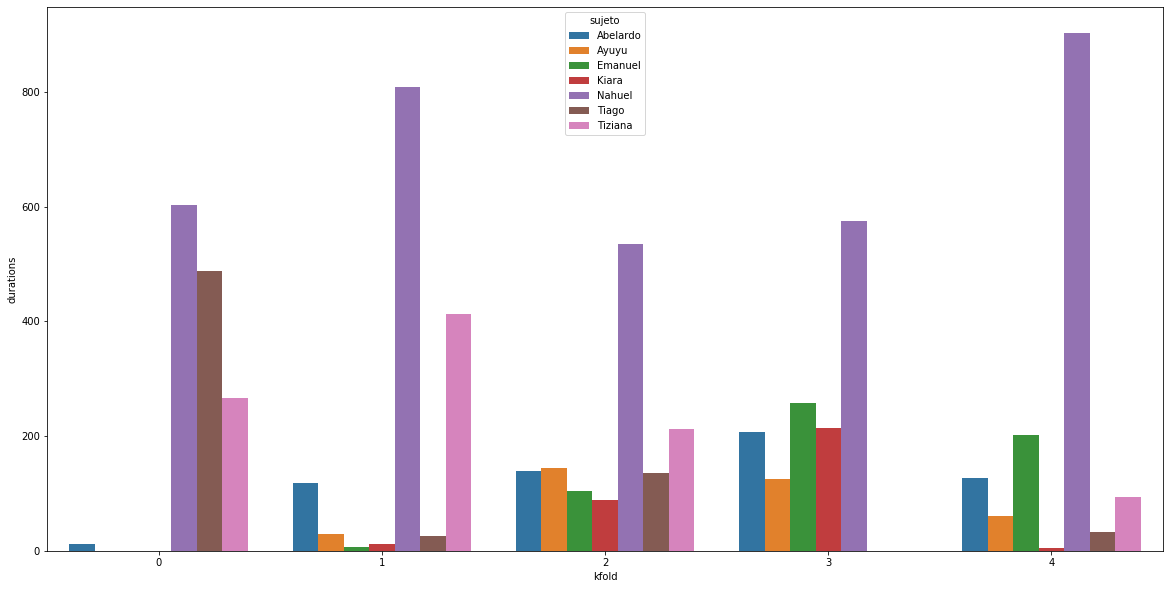

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x="kfold", y="durations", hue="sujeto", data=dfMetaPlot)

In [19]:
import plotly.express as px

In [20]:
dfMetaPlot = dfMetadata.groupby(["sujeto","kfold"], as_index=False).agg({"durations":sum})

In [21]:
fig = px.bar(dfMetaPlot, x="kfold", y="durations", color="sujeto", 
             title="kFolds divididos por hablante"
             )
fig.update_layout(showlegend=False)
fig.show()

In [10]:
dfMetaPlot = dfMetadata
dfMetaPlot["sujeto_plot"] = dfMetaPlot["sujeto"]
dfMetaPlot["sujeto-speakers"] = dfMetaPlot["sujeto"] + "-" + dfMetaPlot["speakers_agg"]
dfMetaPlot.loc[ dfMetaPlot.sujeto == "Nahuel", "sujeto_plot"] = dfMetaPlot["sujeto-speakers"]
dfMetaPlot = dfMetaPlot.groupby(["sujeto_plot","kfold"], as_index=False).agg({"durations":sum})

In [11]:
px.colors.qualitative.Plotly

['#636EFA',
 '#EF553B',
 '#00CC96',
 '#AB63FA',
 '#FFA15A',
 '#19D3F3',
 '#FF6692',
 '#B6E880',
 '#FF97FF',
 '#FECB52']

In [12]:
fig = px.bar(dfMetaPlot, x="kfold", y="durations", color="sujeto_plot", 
             title="kFolds divididos por hablante",
             category_orders={"sujeto_plot": [
                                              "Tiago",
                                              "Abelardo", 
                                              "Tiziana",
                                              "Kiara", 
                                              "Ayuyu", 
                                              "Emanuel", 
                                              
                                              
                                              "Nahuel-Mujer",
                                              "Nahuel-Hombre",
                                              "Nahuel-Niñe"]
             },
             color_discrete_map={
                "Abelardo": "#FF6692",
                "Ayuyu": "#EF553B",
                "Emanuel": "#00CC96",
                "Kiara": "#AB63FA",
                "Tiago": "#FFA15A",
                "Tiziana": "#19D3F3",
                "Nahuel-Mujer": "#636EFA",
                "Nahuel-Hombre": "#929afc",
                "Nahuel-Niñe": "#d0d4fe",
             })
fig.show()

In [ ]:
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()